In [1]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib as plt 
import seaborn as sns 

In [2]:
train = pd.read_csv("train_sample.csv")

In [4]:
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,598,I-Medium Risk,1,1,1,27600,50200,50200,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,305,L-Very High Risk,3,0,0,0,0,0,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,No Bureau History Available,0,0,0,0,0,0,1,1


In [3]:
train.dtypes

UniqueID                           int64
disbursed_amount                   int64
asset_cost                         int64
ltv                              float64
branch_id                          int64
supplier_id                        int64
manufacturer_id                    int64
Current_pincode_ID                 int64
Date.of.Birth                     object
Employment.Type                   object
DisbursalDate                     object
State_ID                           int64
Employee_code_ID                   int64
MobileNo_Avl_Flag                  int64
Aadhar_flag                        int64
PAN_flag                           int64
VoterID_flag                       int64
Driving_flag                       int64
Passport_flag                      int64
PERFORM_CNS.SCORE                  int64
PERFORM_CNS.SCORE.DESCRIPTION     object
PRI.NO.OF.ACCTS                    int64
PRI.ACTIVE.ACCTS                   int64
PRI.OVERDUE.ACCTS                  int64
PRI.CURRENT.BALA

Both Date.of.Birth and DisbursalDate are of the object type. We have to convert it to DateTime type during data cleaning.


# Size of the dataset:

We can get the size of the dataset using the .shape method

In [5]:
train.shape

(233154, 29)

# Statistical Summary of Numeric Variables:

Pandas describe() is used to view some basic statistical details like count, percentiles, mean, std and maximum value of a data frame or a series of numeric values. As it gives the count of each variable, we can identify the missing values using this method.

In [6]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,Passport_flag,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.002127,289.462994,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.046074,338.374779,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,678.000000,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,1.000000,890.000000,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09,36.000000,1.000000


# Non-Graphical Univariate Analysis:
To get the count of unique values:

The value_counts() method in Pandas returns a series containing the counts of all the unique values in a column. The output will be in descending order so that the first element is the most frequently-occurring element.

Let’s apply value counts to loan_default column

In [7]:
train['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

# To get the list & number of unique values:

The nunique() function in Pandas returns a series with a number of distinct observations in a column

In [8]:
train['branch_id'].nunique()

82

## Similarly, unique() function of pandas returns the list of unique values in the dataset.

In [9]:
train['branch_id'].unique()

array([ 67,  78,  34, 130,  74,  11,   5,  20,  63,  48,  79,   3,  42,
       142,  36,  16, 146, 147,  65,   9,   1, 152,  29,  10,  70,  19,
         7,  85,  61,  17,   8, 153,  18, 162,  68,  72,  64,   2, 160,
       251, 103, 104, 120, 136,  77,  13, 138, 135,  73, 248,  15, 165,
        62,  76, 105, 249, 250, 255, 254,  82, 158, 159, 117, 202, 259,
       207,  35,  69,  97,  43, 257, 258, 260, 111,  66, 261, 101,  14,
       121, 217,  84, 100])

# Filtering based on Conditions:

Dataset can be filtered using different conditions, which can be implemented with the use of logical operators in python. For example, == (double equal to), ≤ (less than or equal to), ≥(greater than or equal to) etc

Let’s apply the same to our dataset and filter out the column which has the Employment.Type as “Salaried”

In [13]:
#train[(train["Employment.Type"]== "salaried")]
train[(train['Employment.Type'] == "Salaried")]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
6,529269,46349,61500,76.42,67,22807,45,1502,1/6/1988,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
7,510278,43894,61900,71.89,67,22807,45,1501,4/10/1989,Salaried,...,17,Not Scored: Not Enough Info available on the c...,1,1,0,72879,74500,74500,0,0
9,510980,52603,61300,86.95,67,22807,45,1492,1/6/1968,Salaried,...,818,A-Very Low Risk,1,0,0,0,0,0,0,0
11,486821,64769,74190,89.23,67,22807,45,1446,7/9/1984,Salaried,...,786,B-Very Low Risk,3,2,0,676,36154,23374,1,0
12,478647,53278,61330,89.68,67,22807,45,1497,1/6/1974,Salaried,...,300,M-Very High Risk,7,2,1,0,69900,69900,0,1
13,479533,49478,57010,89.46,67,22807,45,1497,16-08-84,Salaried,...,738,C-Very Low Risk,10,5,0,79750,187000,187000,4,1
15,600655,47549,61400,79.80,67,22807,45,1440,5/7/1994,Salaried,...,17,Not Scored: Not Enough Info available on the c...,1,0,0,0,0,0,0,1
21,467015,31184,57110,56.91,67,22807,45,1498,29-02-84,Salaried,...,801,B-Very Low Risk,7,5,0,1338774,2306289,2291743,2,0
25,586411,55213,68600,83.09,67,22807,45,1494,1/1/1986,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0


#### Now let’s filter out the records based on two conditions using the AND (&) operator.

In [18]:
train[(train['Employment.Type']=="Salaried")& (train['branch_id']==100)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,NO.OF_INQUIRIES,loan_default
192434,620818,58259,77933,76.99,100,18731,86,644,15-02-68,Salaried,...,710,D-Very Low Risk,2,1,0,556026,556026,556026,0,0
192436,433804,56259,65761,88.20,100,18731,86,631,1/1/1984,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
192437,648534,59213,68817,88.64,100,20571,86,638,10/8/1984,Salaried,...,673,F-Low Risk,6,1,0,-52,50000,21105,0,0
192439,627548,74079,103777,73.23,100,21335,51,656,5/6/1988,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
192445,530872,61213,75321,83.64,100,24273,86,650,10/8/1969,Salaried,...,752,C-Very Low Risk,3,2,0,1644411,1678000,1678000,0,0
192446,587546,53303,69792,78.81,100,18731,86,636,1/1/1976,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0
192447,648979,24141,66637,39.02,100,18731,86,664,15-03-87,Salaried,...,737,C-Very Low Risk,2,1,0,17056,30760,30760,0,1
192449,642808,52303,70187,76.94,100,18731,86,629,17-09-92,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,1
192452,617778,48349,60820,82.21,100,18731,86,662,1/1/1993,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,1,0
192453,625232,41210,70944,60.61,100,20571,86,630,9/7/1977,Salaried,...,0,No Bureau History Available,0,0,0,0,0,0,0,0


# Finding null values:

When we import our dataset from a CSV file, many blank columns are imported as null values into the Data Frame which can later create problems while operating that data frame. Pandas isnull() method is used to check and manage NULL values in a data frame.

In [19]:
train.isnull().sum()

UniqueID                            0
disbursed_amount                    0
asset_cost                          0
ltv                                 0
branch_id                           0
supplier_id                         0
manufacturer_id                     0
Current_pincode_ID                  0
Date.of.Birth                       0
Employment.Type                  7661
DisbursalDate                       0
State_ID                            0
Employee_code_ID                    0
MobileNo_Avl_Flag                   0
Aadhar_flag                         0
PAN_flag                            0
VoterID_flag                        0
Driving_flag                        0
Passport_flag                       0
PERFORM_CNS.SCORE                   0
PERFORM_CNS.SCORE.DESCRIPTION       0
PRI.NO.OF.ACCTS                     0
PRI.ACTIVE.ACCTS                    0
PRI.OVERDUE.ACCTS                   0
PRI.CURRENT.BALANCE                 0
PRI.SANCTIONED.AMOUNT               0
PRI.DISBURSE

We can see that there are 7661 missing records in the column ‘Employment.Type’. These missing records should be either deleted or imputed in the data preprocessing stage.

## Data Type Conversion using to_datetime() and astype() methods:

Pandas astype() method is used to change the data type of a column. to_datetime() method is used to change particularly to DateTime type. When the data frame imported from a CSV file, the data type of the columns are set automatically, which many times is not what it actually should have. For example, in the above dataset, Date.of.Birth and DisbursalDate are both set as object type but they should be DateTime.

Example of to_datetime():

In [20]:
train['Date.of.Birth']=pd.to_datetime(train['Date.of.Birth'])

In [21]:
train['ltv'] = train['ltv'].astype('int64')

# Graphical Univariate Analysis:
### Histogram:

Histograms are one of the most common graphs used to display numeric data. Histograms two important things we can learn from a histogram:

    distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
    To identify outliers — Extremely low or high values that do not fall near any other data points.

Lets plot histogram for the ‘ltv’ feature in our dataset

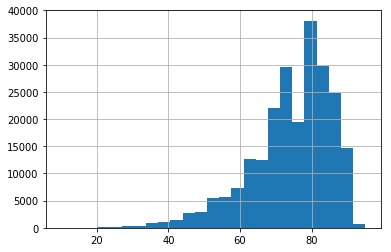

In [22]:
train['ltv'].hist(bins=25)

Here, the distribution is skewed to the left.

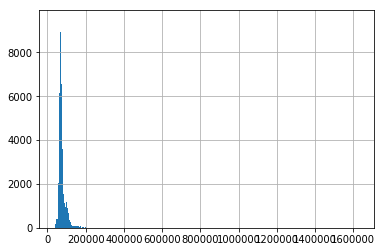

In [24]:
train['asset_cost'].hist(bins=2000)

The above one is a normal distribution with a few outliers in the right end.

# Box Plots:

A Box Plot is the visual representation of the statistical summary of a given data set.

The Summary includes:

    Minimum
    First Quartile
    Median (Second Quartile)
    Third Quartile
    Maximum

It is also used to identify the outliers in the dataset.


AxesSubplot(0.125,0.125;0.775x0.755)


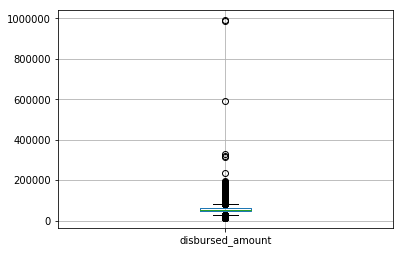

In [25]:
print(train.boxplot(column='disbursed_amount'))

#### Here we can see that the mean is around 50000. There are also few outliers at 600000 and 1000000 which should be treated in the preprocessing stage.

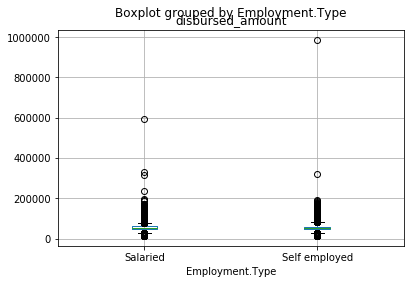

In [28]:
train.boxplot(column='disbursed_amount', by = 'Employment.Type')

## Count Plots:

A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.

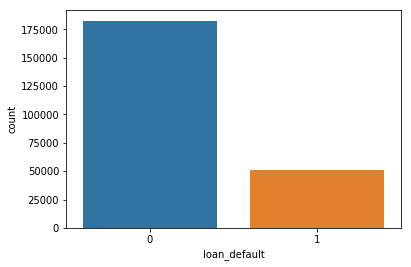

In [29]:
sns.countplot(train.loan_default)

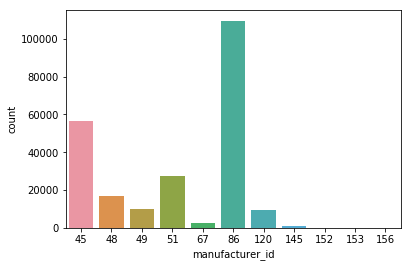

In [30]:
sns.countplot(train.manufacturer_id)

### Here we can see that category “86” is dominating over the other categories.

# Thanks!